In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [2]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): eta = h_pd['h']/data_['A']
	else: eta = data_['h']/data_['A']
	if a==None: a,b=0,1
	E=0
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5):
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		E+=sum((a*t[i]+b)*N_t*phi_t)
	return E

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

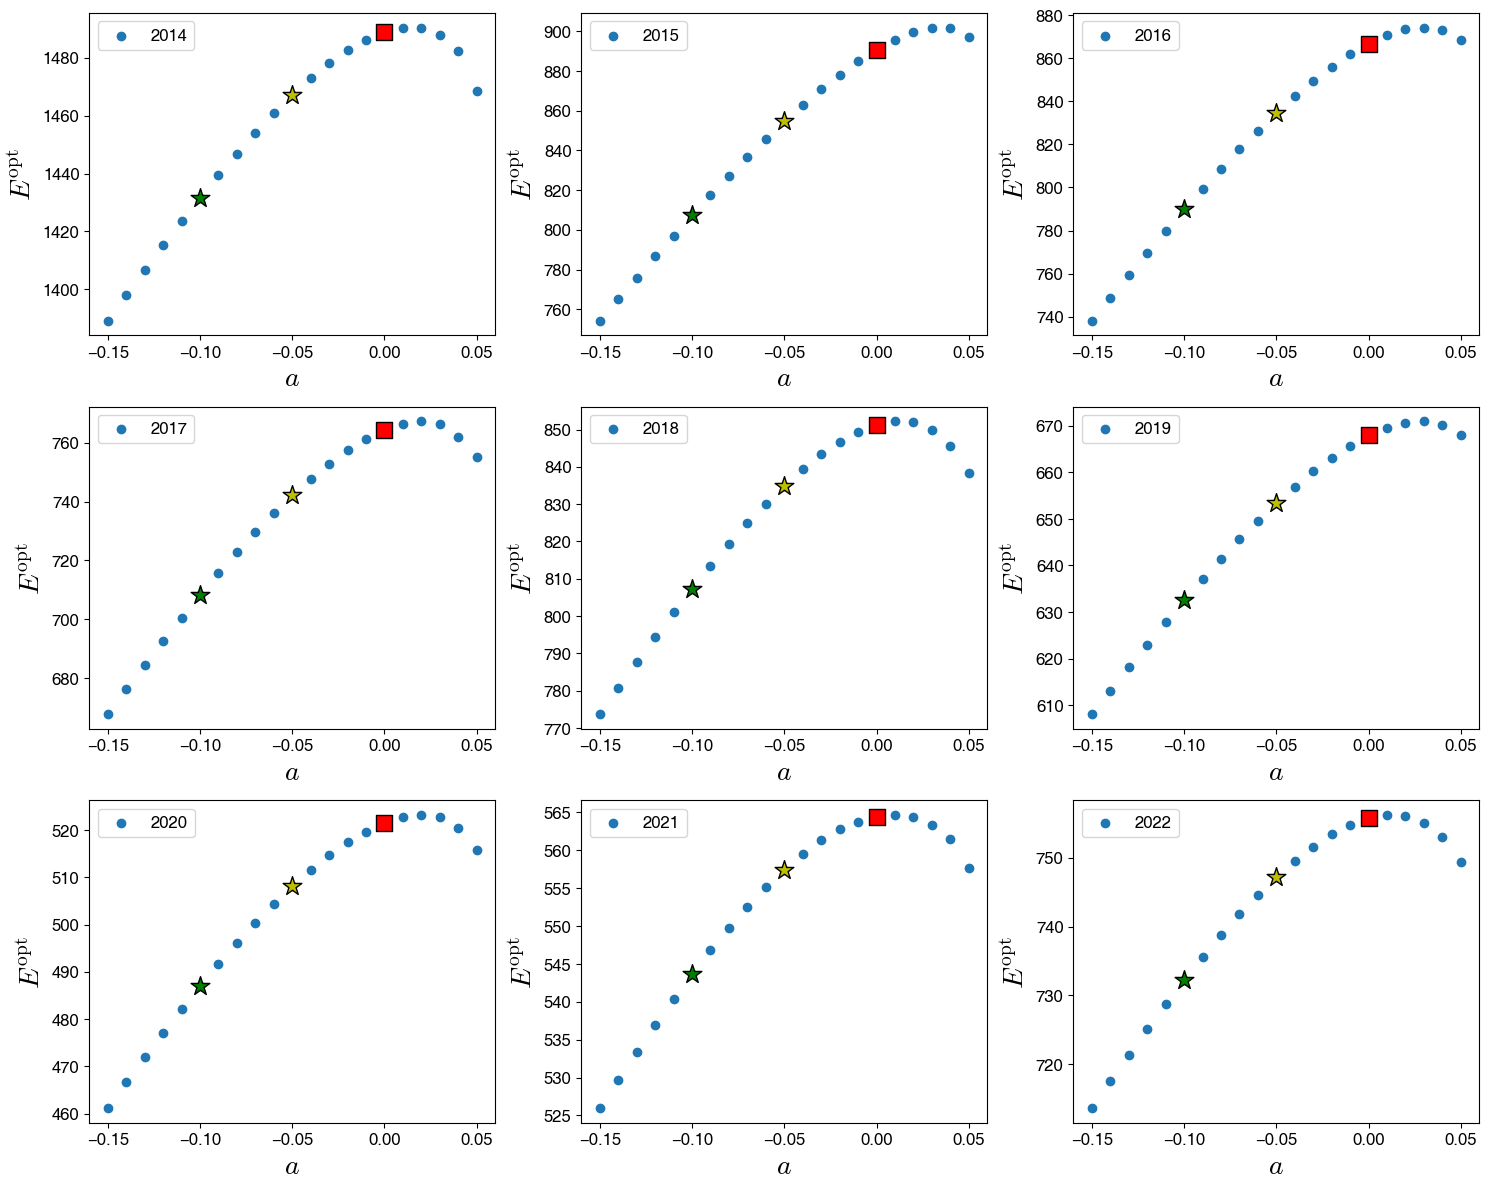

In [ ]:
save_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c=0
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/dataframe_40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		# h_opt = pd.read_csv(save_path+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')
		# E_list.append(E(data, h_pd=h_opt))

		ai+=1
	ax = fig.add_subplot(gs[c//3, c%3])
	ax.scatter(np.linspace(-0.15,0.05,21), E_list, label=str(year))
	ax.scatter(np.linspace(-0.15,0.05,21)[15], E_list[15], marker='s', ec='k',s=120,c='r')
	ax.scatter(np.linspace(-0.15,0.05,21)[10], E_list[10], marker='*', ec='k',s=200,c='y')
	ax.scatter(np.linspace(-0.15,0.05,21)[5], E_list[5], marker='*', ec='k',s=200,c='g')
	ax.set_xlabel(r'$a$',size=20)
	ax.set_ylabel(r'$E^\mathrm{opt}$',size=20)
	ax.tick_params(axis='x', labelsize=12)
	ax.tick_params(axis='y', labelsize=12)
	ax.legend(fontsize='large')
	c+=1
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/E_a.pdf',format='pdf',transparent=True)
plt.show()

In [28]:
np.linspace(-0.15, 0.05, 21)[5]

-0.09999999999999999

In [32]:
E(data)

884.5090909090516

In [34]:
b(data,a=0)

1.0

In [35]:
a = -0.1
b_ = b(data, a)

In [38]:
t = [45, 55, 65, 75, 85]
for tt in t:
    print(a*tt+b_)

4.286206306925315
3.2862063069253153
2.2862063069253153
1.2862063069253153
0.28620630692531535


In [40]:
a = -0.05
b_ = b(data, a)

In [41]:
t = [45, 55, 65, 75, 85]
for tt in t:
    print(a*tt+b_)

2.6431031534626577
2.1431031534626577
1.6431031534626577
1.1431031534626577
0.6431031534626577
